# Plotting tube manifolds

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from functools import partial

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Helvetica']

# plt.style.use('seaborn-white') # use sans-serif fonts
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['figure.figsize'] = 5, 5

mpl.rcParams['axes.spines.left'] = True   ## display axis spines
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0

import henonheiles
import importlib
importlib.reload(henonheiles)
import henonheiles as HH2dof

params = [1.0, 1.0, 1.0, 1.0, 1.0]
total_energy = 0.19



In [19]:

def plot_manifold_segment(ax, datapath, params_filename, manifold_filename):
    """
    Plots a piece of the manifold on a plot axes
    """
    
    mani_params = np.loadtxt(datapath + params_filename).astype('int')

    smani = np.loadtxt(datapath + manifold_filename)

    timestep_skip_index = 225
    traj_skip_index = 3
    for i in range(0,mani_params[-1],traj_skip_index):
        if i == 0:
            ax.plot(smani[i+timestep_skip_index:mani_params[i] - 1,0], \
                             smani[i+timestep_skip_index:mani_params[i] - 1,1], '-c')
        else:
            ax.plot(smani[np.sum(mani_params[0:i-1])+timestep_skip_index:np.sum(mani_params[0:i])-1,0], \
                             smani[np.sum(mani_params[0:i-1])+timestep_skip_index:np.sum(mani_params[0:i])-1,1], '-c')

#         print(np.sum(mani_params[0:i-1]),np.sum(mani_params[0:i+1])-1)

    return ax


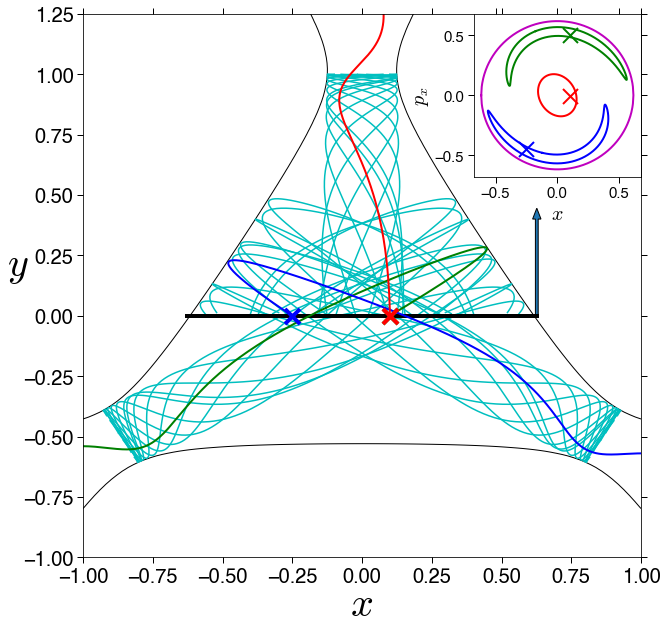

In [38]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

ls_axes = 40
ls_tick = 20 #10, 20
mpl.rcParams['xtick.labelsize'] = ls_tick
mpl.rcParams['ytick.labelsize'] = ls_tick
mpl.rcParams['axes.labelsize'] = ls_axes 
traj_lw = 2

xRes = 100
yRes = 100
xVec = np.linspace(-1.0, 1.0, xRes)
yVec = np.linspace(-1.0, 1.25, yRes)


total_energy = 0.19
manifold_time = 80
datapath_ris = '../../henonheiles/data/manifolds_E19e-2/firstRIs/'
ri_topsaddle, ri_leftsaddle, ri_rightsaddle = HH2dof.get_ris_data(datapath_ris, total_energy, \
                                                                 manifold_time)

params = [1.0, 1.0, 1.0, 1.0, 1.0]
y_constant = 0
energy_boundary = HH2dof.energy_boundary_sos_xpx(params, total_energy, y_constant)

# Initial conditions that lead to escape
init_cond_left = [0.1, 0, 0.5] # short escape, left exit
py_left = HH2dof.momentum_fixed_energy(init_cond_left[0], init_cond_left[1], init_cond_left[2], \
                                      params, total_energy)
init_cond_left.append(py_left)

init_cond_top = [0.1, 0, -0.01] # short escape, top exit
py_top = HH2dof.momentum_fixed_energy(init_cond_top[0], init_cond_top[1], init_cond_top[2], \
                                      params, total_energy)
init_cond_top.append(py_top)

init_cond_right = [-0.25, 0, -0.45]
py_right = HH2dof.momentum_fixed_energy(init_cond_right[0], init_cond_right[1], init_cond_right[2], \
                                        params, total_energy)
init_cond_right.append(py_right)

rel_tol = 1.e-12
abs_tol = 1.e-14
time_span = [0, 1000]
sol_left = solve_ivp(HH2dof.vector_field, time_span, init_cond_left, args = params, \
                events = (HH2dof.event_escape_left, HH2dof.event_escape_right, HH2dof.event_escape_top), \
                dense_output = True, rtol = rel_tol, atol = abs_tol)

sol_top = solve_ivp(HH2dof.vector_field, time_span, init_cond_top, args = params, \
                events = (HH2dof.event_escape_left, HH2dof.event_escape_right, HH2dof.event_escape_top), \
                dense_output = True, rtol = rel_tol, atol = abs_tol)

sol_right = solve_ivp(HH2dof.vector_field, time_span, init_cond_right, args = params, \
                events = (HH2dof.event_escape_left, HH2dof.event_escape_right, HH2dof.event_escape_top), \
                dense_output = True, rtol = rel_tol, atol = abs_tol)

# pe_cont_vals = [1/6, total_energy]
pe_cont_vals = [0.19]
pe_cont_cols = ['k']

fig_traj_pes = plt.figure(figsize = (10,10))
ax_traj_pes = fig_traj_pes.gca()
xMesh, yMesh = np.meshgrid(xVec, yVec)
pe_surf = HH2dof.potential_energy(xMesh, yMesh, params[2:])
ax_traj_pes.contour(xMesh, yMesh, pe_surf, levels = pe_cont_vals, \
                    colors = pe_cont_cols, linewidths = 1.0)

datapath = "../../henonheiles/tube-manifolds/"
params_filename_eqpt2 = "mfd_params_stable_eqPt2_DelE0.023333_t30.txt"
manifold_filename_eqpt2 = "mfd_stable_branch1_eqPt2_DelE0.023333_t30.txt"
params_filename_eqpt3 = "mfd_params_stable_eqPt3_DelE0.023333_t30.txt"
manifold_filename_eqpt3 = "mfd_stable_branch1_eqPt3_DelE0.023333_t30.txt"
params_filename_eqpt4 = "mfd_params_stable_eqPt4_DelE0.023333_t30.txt"
manifold_filename_eqpt4 = "mfd_stable_branch-1_eqPt4_DelE0.023333_t30.txt"
ax_traj_pes = plot_manifold_segment(ax_traj_pes, datapath, params_filename_eqpt2, manifold_filename_eqpt2)
ax_traj_pes = plot_manifold_segment(ax_traj_pes, datapath, params_filename_eqpt3, manifold_filename_eqpt3)
ax_traj_pes = plot_manifold_segment(ax_traj_pes, datapath, params_filename_eqpt4, manifold_filename_eqpt4)

ax_traj_pes.plot(np.linspace(-np.sqrt(2*total_energy)-0.01,np.sqrt(2*total_energy)+0.01, 100), \
                 np.zeros((100,1)),'-k', lw = 4)
ax_traj_pes.arrow(np.sqrt(2*total_energy)+0.01, 0, 0, 0.4, width = 0.01)
# ax_traj_pes.text(np.sqrt(2*total_energy)+0.12, 0, r'$y = 0$', fontsize = 30)

ax_traj_pes.plot(init_cond_left[0], init_cond_left[1], 'xg', markersize = 15, markeredgewidth = 4)
ax_traj_pes.plot(sol_left.y[0,:], sol_left.y[1,:], '-g', linewidth = 2)
ax_traj_pes.plot(init_cond_right[0], init_cond_right[1], 'xb', markersize = 15, markeredgewidth = 4)
ax_traj_pes.plot(sol_right.y[0,:], sol_right.y[1,:], '-b', linewidth = 2)
ax_traj_pes.plot(init_cond_top[0], init_cond_top[1], 'xr', markersize = 15, markeredgewidth = 4)
ax_traj_pes.plot(sol_top.y[0,:], sol_top.y[1,:], '-r', linewidth = 2)
ax_traj_pes.set_ylabel(r'$y$', labelpad = 5, rotation = 0)
ax_traj_pes.set_xlabel(r'$x$', labelpad = 0)
ax_traj_pes.set_xlim([-1,1])


# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax_traj_pes, [0.7,0.7,0.3,0.3])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
# mark_inset(ax_traj_pes, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

plt.plot(energy_boundary[:,0], energy_boundary[:,1], '-m', linewidth = 2)
ax2.plot(ri_topsaddle[:,1], ri_topsaddle[:,3], '-r', lw = 2)
ax2.plot(ri_leftsaddle[:,1], ri_leftsaddle[:,3],'-g', lw = 2)
ax2.plot(ri_rightsaddle[:,1], ri_rightsaddle[:,3],'-b', lw = 2)
ax2.plot(init_cond_top[0], init_cond_top[2], 'xr', markersize = 15, markeredgewidth = 2)
ax2.plot(init_cond_left[0], init_cond_left[2], 'xg', markersize = 15, markeredgewidth = 2)
ax2.plot(init_cond_right[0], init_cond_right[2], 'xb', markersize = 15, markeredgewidth = 2)


ax2.set_xlabel(r'$x$',fontsize = 20)
ax2.set_ylabel(r'$p_x$',fontsize = 20)
ax2.tick_params(axis='x', labelsize = 15)
ax2.tick_params(axis='y', labelsize = 15)

# ax_traj_pes.text(-1.45,1.1, r'(d) $T_E$ = %.1f'%(sol.t_events[2]), fontsize = 30)
plt.savefig('stable_manifolds_energy19e-2.png', dpi = 300, bbox_inches = 'tight')


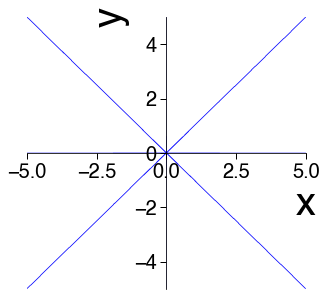

In [113]:
from sympy import var, plot_implicit
var('x y')
plot_implicit(x*y**3 - y*x**3)